## **FINAL PROJECT - DSCI 100** 
#### *Predicting Usage of a Video Game Research Server*
Emily Chai

#### ***Introduction***

A research group in Computer Science at UBC is currently running a research project to study how people play video games. More specifically, they have set up a Minecraft server where players can join and play as their actions are being recorded in-game. The research team collected data on demographics, player behaviour as well as activity levels. This data can help them better understand engagement patterns among different types of players which will in turn give them an idea of how to allocate their resources.

The goal of my analysis is the answer the question:              
**Can we predict a player's total time spent on the Minecraft server based on their age?**
- response variable = played_hours
- explanatory varibale = Age

**Data Description:**                                                
In my project, I will be using the players.csv dataset which contains both demographic as well as behaviour data for the individuals involved in this study
- original file used: players.csv
- number of observations: 196
- number of variables: 7                                                                                                                   
note: rows with missing values were removed.

**Variables:**
- experience: the experience level of a player
- subscirbe: whether the player is subscribed to the game newsletter
- hashedEmail: hashed version of player's email
- played_hours: total number of hours spent on the Minecraft server
- name: the player's first name
- gender: gender of the player
- age: age of the player

**Data Issues:**
I found that there were a few extreme values for played_hours that are potential outliers as well as many players with a super low playtime which could have introduced skew in the data

note: I only used the Age and played_hours variables in my project.

#### ***Methods and Results***

1. First, I loaded packages into the notebook

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(tidymodels)
library(tidyclust)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

2. Next, I loaded in the players.csv dataset from canvas as well as filtered the data to include only rows with non-missing values for variabled Age and played hours.

In [2]:
players <- read_csv("players.csv") |>
filter(!is.na(Age), !is.na(played_hours))
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


3. I then created a plot to see if there was an initial relationship between age and total time spent on Minecraft, colouring the data points with gender. Each data point represents one player

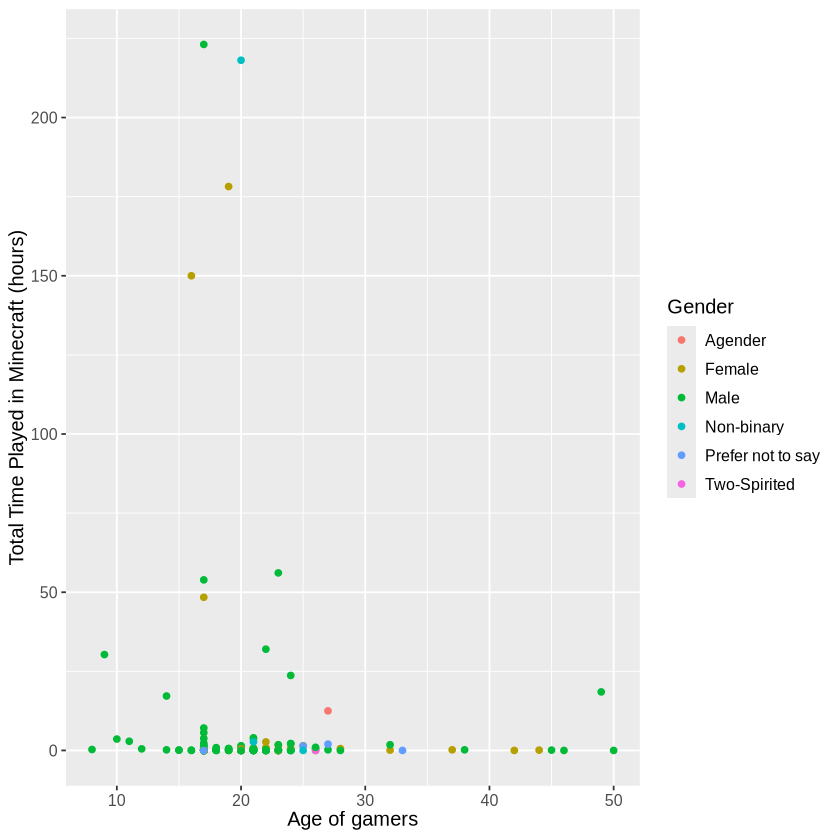

In [3]:
 players_plot <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(aes(colour = gender)) +
  labs(x = "Age of gamers", y = "Total Time Played in Minecraft (hours)", colour = "Gender") +
  theme(text = element_text(size = 12))
players_plot

**Figure 1** - Age vs Total Time Played (raw data)

4. I calculated the average number of hours played for each age group and then plotted it. I did this so that I could reduce noise from individual differences and to see if certain age groups tend to spend more time on the server on average.

Age,hours_average
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
46,0.0
49,18.5
50,0.0


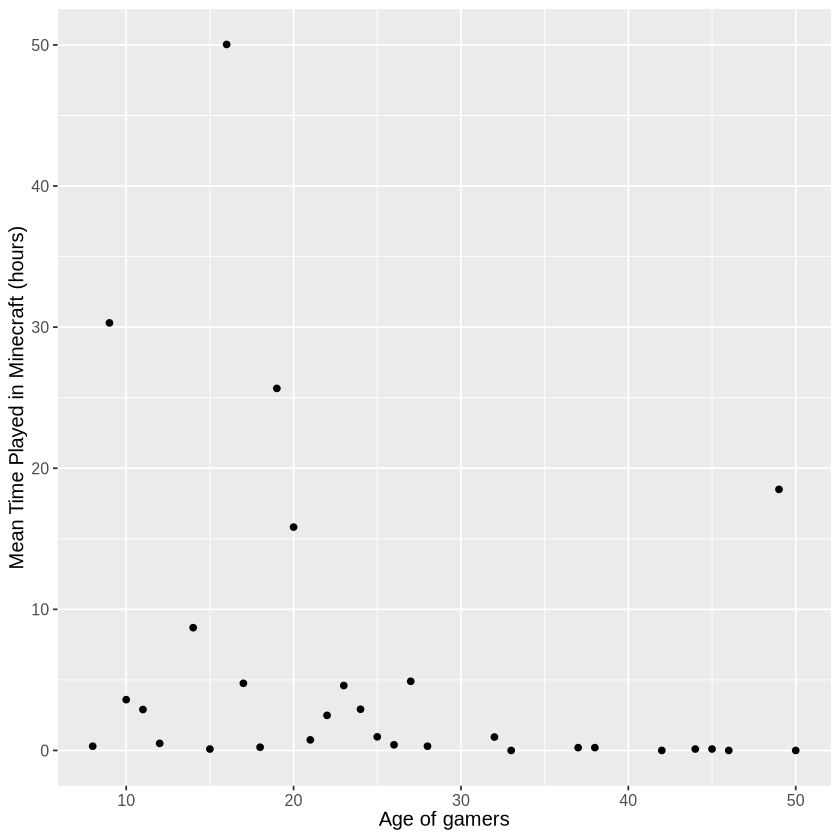

In [4]:
players_mean_playtime <- players |>
    group_by(Age) |>
    summarize(hours_average = mean(played_hours, na.rm = TRUE))
players_mean_playtime

players_mean_plot <- ggplot(players_mean_playtime, aes(x = Age, y = hours_average)) +
  geom_point() +
  labs(x = "Age of gamers", y = "Mean Time Played in Minecraft (hours)", colour = "Gender") +
  theme(text = element_text(size = 12))
players_mean_plot

**Figure 2** - Mean playtime by Age 

5. I split the dataset into a training set (70%) and a testing set (30%) using the strata as played_hours to make sure both sets of data have a similar distribution of values for played_hours. I did this so that I could train the model with 70% of the data and then later evaluate its peformance on unseen data (testing data)

In [5]:
set.seed(1234)
players_split <- initial_split(players, prop = 0.70, strata = played_hours)
players_split
players_training <- training(players_split)
players_training
players_testing <- testing(players_split)
players_testing

<Training/Testing/Total>
<134/60/194>

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,93efabc9f7de58f44c457bac715cf8f9f44cd88cc574fc02624cac194d2f0ea5,2.1,Sebastián,Male,24
Amateur,TRUE,42382bb2af563e6979c5b84d288cbb49bb2ef90b1bcf196c2902da4ce20eb7f3,0.8,Hunter,Female,22
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0.0,Orion,Male,17
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


6. I created a K-Nearest Neighbours regression model using the tune() function in neighbours to allow for the tuning of the number of neigbours (k value). Since knn predicts values based on the average of the k nearest data points, we can tune the neighbours to let the model choose the k value that minimizes rmse.

 I then created a recipe to scale and center the predictor variable, Age.  Without scaling, variables with bigger numbers can overpower or dominate the results. Therefore scaling puts everything on the same scale

7. I used a 10 fold cross validation on the training data and created a workflow to combine the knn model as well as the preprocessing recipe. This cross validation step will help us predict the accuracy of the model solely using the training set so that we can have a better idea before using it on the test set.

In [7]:
players_vfold <- vfold_cv(players_training, v = 10, strata = played_hours)

players_workflow <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(players_spec) 
players_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


8. I used grid to test knn models with different number of neigbours (1-20) and got the rmse value for each. This step allows us to find the number of neigbours (k) that would return the lowest rmse value (prediction error).

In [8]:
players_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))
players_results <- players_workflow |>
       tune_grid(resamples = players_vfold, grid = players_vals) |>
       collect_metrics() |>
       filter(.metric == "rmse")
players_results

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,26.93450,10,7.384526,Preprocessor1_Model01
3,rmse,standard,30.04384,10,7.135987,Preprocessor1_Model02
5,rmse,standard,30.39716,10,6.511921,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
15,rmse,standard,28.73543,10,6.910445,Preprocessor1_Model08
17,rmse,standard,27.96933,10,6.917606,Preprocessor1_Model09
19,rmse,standard,27.98462,10,6.910657,Preprocessor1_Model10


9. This function allowd me to select the k value that gave the lowest average rmse value during cross validation.

In [9]:
players_min <- players_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,26.9345,10,7.384526,Preprocessor1_Model01


10. Next, I used the best k value (in this case k=1) to rebuild a final knn model and then fit it to the training data. Then I made predictions on the test set and calculated the model's metrics. This will tell us how the model will perform on unseen data. 

In [10]:
players_min <- players_min |>
          pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = players_min) |>
          set_engine("kknn") |>
          set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
          add_model(players_best_spec) |>
          fit(data = players_training)

players_testing_1 <- players_testing |>
    filter(!is.na(Age))

players_summary <- players_best_fit |>
           predict(players_testing_1) |>
           bind_cols(players_testing_1) |>
           metrics(truth = played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.38853722
rsq,standard,0.02012079
mae,standard,1.70000000


11. Now, I plotted the playtime points as well as the predicted values (blue line) across age (test data). This plot allows us to visualize how well the model's prediction match the actual playtime across different ages. It shows the prediction trend.

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


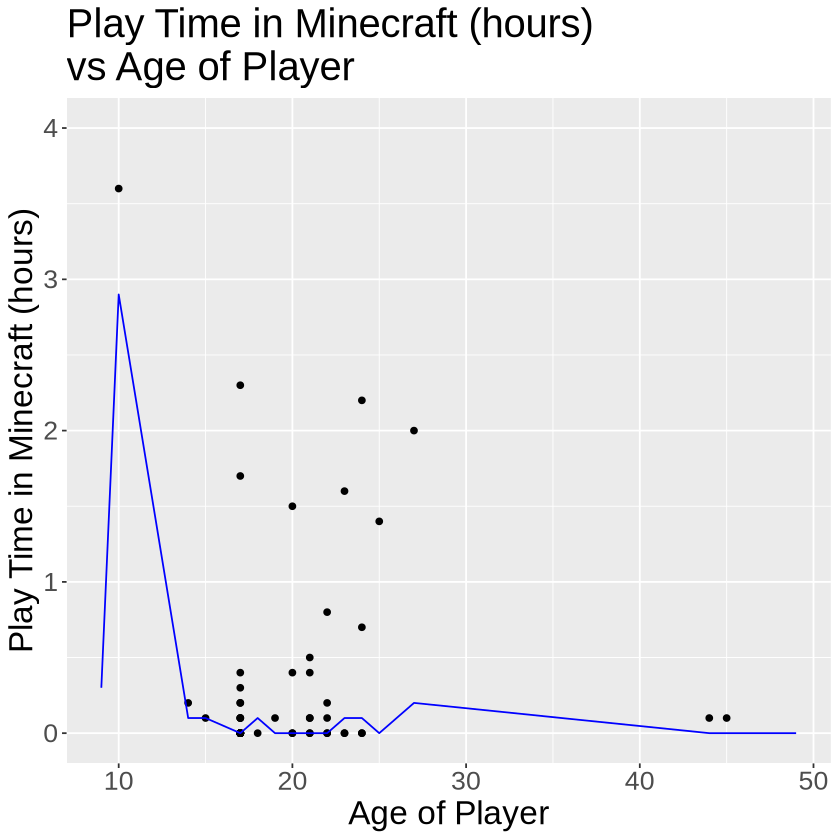

In [11]:
players_testing_1 <- players_testing |>
    filter(!is.na(Age))

players_preds <- players_best_fit |>
predict(players_testing_1) |>
bind_cols(players_testing_1)

players_plot <- players_preds |>
arrange(Age) |>
ggplot(aes(x = Age, y = played_hours)) +
geom_point() +
geom_line(aes(y = .pred), colour = "blue") +
    labs(x = "Age of Player", 
         y = "Play Time in Minecraft (hours)", 
         title = "Play Time in Minecraft (hours)\nvs Age of Player") +
        ylim(0,4) +
        theme(text = element_text(size = 20))
players_plot

**Figure 3** - Actual vs Predicted Playtime by Age

#### ***Discussion***

**What was found:**                                             
The KNN regression model chose k = 1 as the best number of neigbours based on the return of the lowest rmse value we got from 10 fold cross validation. Even as the lowest rmse value, it was still relatively high (~27) which may suggest that age alone is not a strong enough predictor of how much time an individual/player will spend on the Minecraft server. More on the k value, since we got k = 1 (the lowest possible k), this usually means there is a lot of noise or randomness in the data. Adding more predictors and comparing multiple models (eg. linear regression) may improve the results.

**Was this expected?**                                                    
I think the results were mostly expected because its would be hard to believe that age can help us solely predict how long someone stays on a gaming server. The suprising part was from the training data the rmse value returned was ~27 while in the testing data it was 5.4. This is suprising as usually training error<testing error. This may be because the training set included more extreme outliers. 

**Impact:**                                                      
This information tells us that using age alone to predict user engagement might lead to misinformed recruitment efforts as well as how they choose to allocate their resources. I would suggest adding more predictors to gain a more solid understanding of the relationships and build a stronger algoritm.

**Future questions:**                                       
Can a combination of the varibles (eg. age + gender) help better predict the total playtime in a server of an individual?
